<a href="https://colab.research.google.com/github/M-Waleed458/AgenticAIProjects/blob/main/AgenticAIclass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q google-generativeai

LLMs are only trained on text data while multimodal models are trained on various types of data.

In [ ]:
# Calling Google-API key to communicate with LLM(Gemini)
import google.generativeai as genai
from google.colab import userdata

google_api_key = userdata.get("GOOGLE_API_KEY")
genai.configure(api_key=google_api_key)
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content("what is the current population of Pakistan?")
print(response.text)
# response // to know information about how many numbers of token are using for both prompt and response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "As of October 26, 2023, the current population of Pakistan is estimated to be around **240 million**.  Keep in mind that population numbers are constantly changing, and different organizations may provide slightly varying estimates.\n"
              }
            ],
            "role": "model"
          },
          "finish_reason": "STOP",
          "avg_logprobs": -0.20793453216552735
        }
      ],
      "usage_metadata": {
        "prompt_token_count": 8,
        "candidates_token_count": 50,
        "total_token_count": 58
      },
      "model_version": "gemini-1.5-flash"
    }),
)

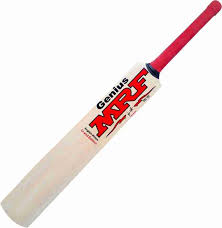

In [ ]:
import PIL.Image
image = PIL.Image.open("bat.jpg")
image

In [ ]:
prompt = """this is a image of a bat , describe features of ths bat in the form of jason format? like
json{
  color = red,

}
do not use \n after every key=value """

model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content([prompt, image])
response.text

'Here\'s a JSON representation of the features of the cricket bat in the image:\n\n```json\n{\n  "brand": "MRF",\n  "model": "Genius",\n  "color": {\n    "blade": "light brown/beige",\n    "handle": "red",\n    "branding": "red and black"\n  },\n  "material": "likely wood (unspecified type)",\n  "features": [\n    "conventional shape",\n    "relatively large blade",\n    "textured grip"\n  ],\n  "size": "unspecified (image provides no scale)"\n}\n```\n'

In [ ]:
# to manage conversational history with LLM
chat = model.start_chat(history=[])
response = chat.send_message("what is the boiling point of water?")
print(response.text)
print(chat.history)

The boiling point of water is 100 degrees Celsius (212 degrees Fahrenheit) at standard atmospheric pressure.

[parts {
  text: "what is the boiling point of water?"
}
role: "user"
, parts {
  text: "The boiling point of water is 100 degrees Celsius (212 degrees Fahrenheit) at standard atmospheric pressure.\n"
}
role: "model"
]


In [ ]:
response = chat.send_message("what is the hight of burj khlifa?")
response.text


[parts {
  text: "what is the boiling point of water?"
}
role: "user"
, parts {
  text: "The boiling point of water is 100 degrees Celsius (212 degrees Fahrenheit) at standard atmospheric pressure.\n"
}
role: "model"
, parts {
  text: "what is the hight of burj khlifa?"
}
role: "user"
, parts {
  text: "The height of the Burj Khalifa is approximately **828 meters** (2,717 feet).\n"
}
role: "model"
, parts {
  text: "what is the hight of burj khlifa?"
}
role: "user"
, parts {
  text: "The Burj Khalifa\'s height is approximately **828 meters** (2,717 feet).\n"
}
role: "model"
]


In [ ]:
model = genai.GenerativeModel(
    'gemini-1.5-flash',
    generation_config= genai.GenerationConfig(
        max_output_tokens=25,
        temperature=2.0) # min-value = 0.1 , max-value = 2.0 (temperature defines how creative the LLM is)
)

response = model .generate_content("Name of the curruent CEO of Google?")
response.text

'The current CEO of Google (Alphabet Inc.) is Sundar Pichai.\n'

In [2]:
! pip install -q aisuite[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.9/863.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.2/259.2 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 66.1 MB/s eta 0:00:00


In [5]:
import aisuite as ai
import os
from google.colab import userdata

os.environ['GROQ_API_KEY'] = userdata.get('GROQ_API_KEY')
client = ai.Client()
messages = [
    {'role' : 'system', 'content': 'you are health expert.'},
    {'role' : 'user', 'content' : "I am feeling headache, what i need to do immediately?"}
]
response = client.chat.completions.create(model="groq:llama-3.2-3b-preview", messages=messages)
print(response.choices[0].message.content)

I'm sorry to hear that you're experiencing a headache. As a health expert, I'd recommend the following steps to help alleviate your headache:

1. **Stay hydrated**: Drink plenty of water to help your body replenish fluids and electrolytes. Dehydration is a common cause of headaches.
2. **Rest and quiet**: Find a quiet and dark space to lie down or sit comfortably. Avoid any stimulating activities or conversations that might exacerbate your headache.
3. **Apply cold or warm compress**: Use an ice pack or a warm washcloth to apply gentle pressure to your forehead, neck, or shoulders. Some people find relief from cold temperatures, while others prefer warmth.
4. **Over-the-counter pain relief**: Consider taking an over-the-counter (OTC) pain reliever such as ibuprofen (Advil, Motrin) or acetaminophen (Tylenol). However, always follow the recommended dosage and consult your doctor if you have any pre-existing medical conditions or take prescription medications.
5. **Avoid triggers**: If yo

In [9]:
# do it later as it need additional setup

import aisuite as ai
import os
from google.colab import userdata

os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")
client = ai.Client()
messages = [
    {'role' : 'system' , 'content' : "you are cricket expert"} ,
    {'role' : 'user' , 'content' : 'what is LBW in cricket ?'}
]
response = client.chat.completions.create(model='google:gemini-1.5-flash', messages=messages)
print(response.choices[0].message.content)






OSError: Missing one or more required Google environment variables: GOOGLE_PROJECT_ID, GOOGLE_REGION, GOOGLE_APPLICATION_CREDENTIALS. Please refer to the setup guide: /guides/google.md.